In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mp
import seaborn as sb

# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(city_df, ride_df, how='outer', on='city')

# Display the data table for preview
combined_data_df.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

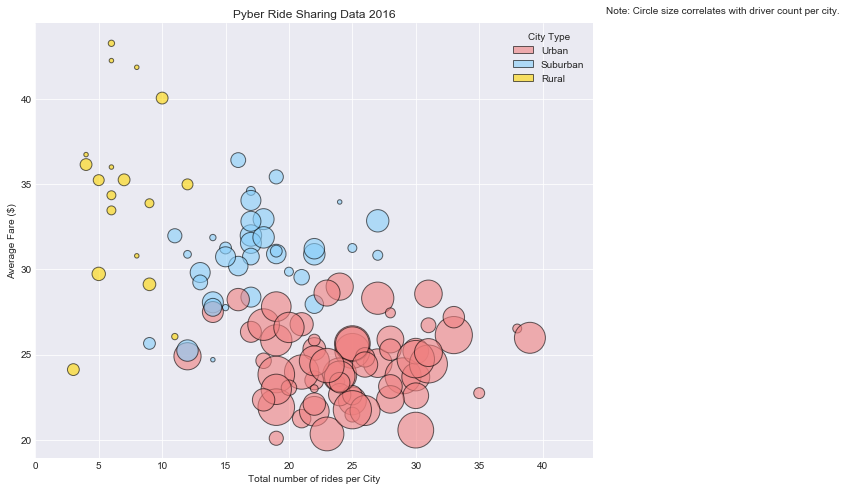

In [26]:
# Obtain the x and y coordinates for each of the three city types

city_type = combined_data_df.groupby(["city"]+["type"]+["driver_count"])
avg_fare = city_type["fare"].mean()
total_rides = city_type["ride_id"].count()
#total_rides = combined_data_df["ride_id"]


#create data frame 
df = pd.DataFrame({
        "Average Fare":avg_fare, 
        "Total Rides": total_rides,
        
})
df = df.reset_index()

# Build the scatter plots for each city types
colors = {"Urban": "lightcoral",
    "Suburban": "lightskyblue", 
    "Rural": "gold"}

import matplotlib.patches as mp
#Circle(xy, radius=5)
urban = mp.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
suburban = mp.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue", alpha=.6, edgecolor="black", linewidth=1)
rural = mp.Circle((0.5, 0.5), 0.1, facecolor="gold", alpha=.6, edgecolor="black", linewidth=1)


# Incorporate the other graph properties
sb.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['Total Rides'], df['Average Fare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([urban, suburban, rural],["Urban","Suburban","Rural"],title= 'City Type')

# Incorporate a text label regarding circle size
ax.text(45,45,'Note: Circle size correlates with driver count per city.')
ax.set_xlim(0, max(df["Total Rides"])+ 5)
ax.set_xlabel("Total number of rides per City")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data 2016")
plt.show()

In [27]:
# Calculate Type Percents
typed1 = city_df.groupby(["type"])
typed2 = combined_data_df.groupby(["type"])
total_fares= typed2["fare"].sum()
total_rides = typed2["ride_id"].count()
total_drivers = typed1["driver_count"].sum()


df2 = pd.DataFrame({
    "Total Fares": total_fares, 
    "Total Rides": total_rides,
    "Total Drivers":total_drivers})
    
df2 = df2.reset_index()
df2

,type,Total Fares,Total Rides,Total Drivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


## Total Fares by City Type

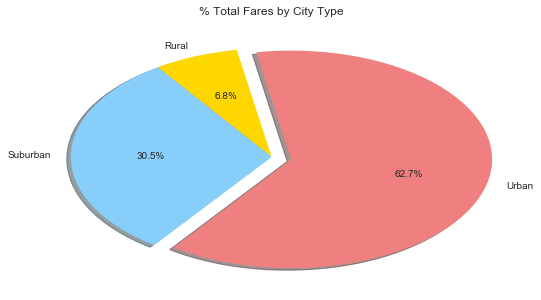

<Figure size 432x288 with 0 Axes>

In [28]:
#Build Graph and Show Figure

labels = df2['type']

sizes = df2['Total Fares']

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(9,5))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,

autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig('Pyber.png')






## Total Rides by City Type

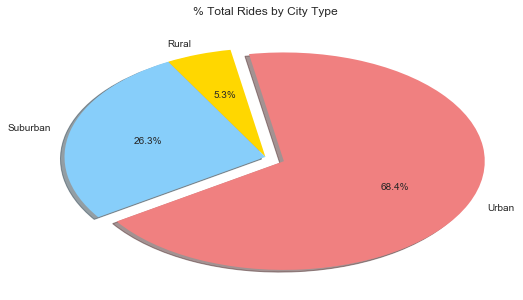

<Figure size 432x288 with 0 Axes>

In [29]:
labels = df2['type']

sizes = df2['Total Rides']

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(9,5))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,

autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig('Pyber.png')

## Total Drivers by City Type

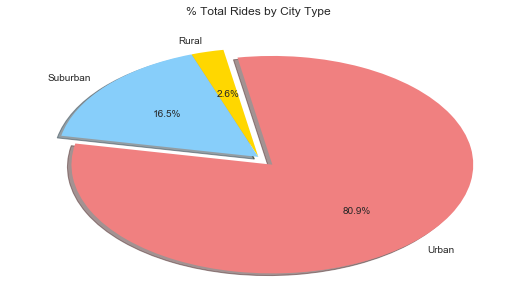

<Figure size 432x288 with 0 Axes>

In [30]:
labels = df2['type']

sizes = df2['Total Drivers']

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,0.1)

plt.figure(figsize=(9,5))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,

autopct="%1.1f%%", shadow=True, startangle=100)

plt.title("% Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig('Pyber.png')

Analysis

In [ ]:
#The greatest number of rides was given in an urban area, due to population size being greater in that area. 
#Total fares correlates with city size, we can deduce that the greater the city size, the greater the population, the more opportunity to provide rides. 
#The inverse is also true, the smaller the population size, perhaps more spread out of spacing, the less availability to recieve a ride. 